In [1]:
#bibliotecas de análise
import pandas as pd
import numpy as np

#pacotes para gráficos
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

#pacote para clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

#pacote para realização do PCA
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

#pacote para arvore de decião
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

#pacotes para o randon florest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

Carregando a tabela de dados préprocessada

In [2]:
df = pd.read_csv('../Scripts/df_metal_PCA.csv', sep = ',', header = 0, na_values = True)
df2 = pd.read_csv('../Scripts/df_metal_ML.csv', sep = ',', header = 0, na_values = True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454 entries, 0 to 1453
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Std     1454 non-null   object 
 1   Su      1454 non-null   int64  
 2   Sy      1454 non-null   int64  
 3   A5      1454 non-null   float64
 4   Bhn     1454 non-null   float64
 5   E       1454 non-null   int64  
 6   G       1454 non-null   int64  
 7   mu      1454 non-null   float64
 8   Ro      1454 non-null   int64  
 9   pH      1454 non-null   float64
 10  HV      1454 non-null   float64
dtypes: float64(5), int64(5), object(1)
memory usage: 125.1+ KB


In [4]:
df.describe(include = 'all')

,Std,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,HV
count,1454,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000
unique,1369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,JIS JIS Grey cast iron Desconhecido,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,513.936726,330.294360,17.432737,45.118294,161825.309491,80385.419532,0.303219,6866.277166,77.460110,33.303989
std,NaN,233.019357,182.779767,13.434072,81.773459,56946.187688,113910.213767,0.025380,2170.580176,241.094212,116.820719
min,NaN,69.000000,28.000000,0.000000,0.000000,73000.000000,26000.000000,0.200000,1750.000000,0.000000,0.000000
25%,NaN,330.000000,200.000000,9.000000,0.000000,105000.000000,40000.000000,0.300000,7160.000000,0.000000,0.000000
50%,NaN,490.000000,294.000000,15.000000,0.000000,205000.000000,79000.000000,0.300000,7860.000000,0.000000,0.000000
75%,NaN,670.000000,420.000000,23.000000,60.000000,206000.000000,80000.000000,0.320000,7860.000000,0.000000,0.000000


In [5]:
df.set_index('Std', inplace = True)

In [6]:
df.head(3)

,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,HV
Std,,,,,,,,,,
ANSI ANSI Steel SAE 1015 as-rolled,421,314,39.0,126.0,207000,79000,0.3,7860,0.0,0.0
ANSI ANSI Steel SAE 1015 normalized,424,324,37.0,121.0,207000,79000,0.3,7860,0.0,0.0
ANSI ANSI Steel SAE 1015 annealed,386,284,37.0,111.0,207000,79000,0.3,7860,0.0,0.0


In [9]:
#padronização dos dados
scaler = StandardScaler().fit(df)
scaler_x = scaler.transform(df)

In [11]:
df_x = pd.DataFrame(data = scaler_x, columns =df.columns, index=df.index)
df_x.head(3)

,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,HV
Std,,,,,,,,,,
ANSI ANSI Steel SAE 1015 as-rolled,-0.398974,-0.089178,1.605967,0.989435,0.79356,-0.012167,-0.126865,0.457972,-0.321396,-0.285184
ANSI ANSI Steel SAE 1015 normalized,-0.386095,-0.034449,1.457041,0.928270,0.79356,-0.012167,-0.126865,0.457972,-0.321396,-0.285184
ANSI ANSI Steel SAE 1015 annealed,-0.549228,-0.253367,1.457041,0.805938,0.79356,-0.012167,-0.126865,0.457972,-0.321396,-0.285184


Analise do componente principais - PCA

In [13]:
#calculando o melhor número de componentes do PCA
pca = PCA(n_components=10)

pca.fit_transform(scaler_x)

array([[ 0.17261158, -1.4638981 ,  0.70310086, ..., -0.48573968,
        -0.05707511,  0.51754779],
       [ 0.20588096, -1.3888715 ,  0.62200731, ..., -0.46208314,
        -0.05210798,  0.5261809 ],
       [ 0.02085208, -1.34760979,  0.79040427, ..., -0.50989399,
        -0.04715816,  0.49277618],
       ...,
       [ 3.36089858,  2.96715733,  0.22603396, ...,  0.17124478,
        -0.05359531, -0.40404754],
       [ 0.48518136,  2.03066648,  0.87171533, ..., -0.05526902,
        -0.5446303 , -0.29151354],
       [ 0.9692361 ,  2.18859229,  0.71184831, ...,  0.02872769,
        -0.40099912, -0.31182435]])

In [14]:
prop_var = pca.explained_variance_ratio_
autovalor = pca.explained_variance_

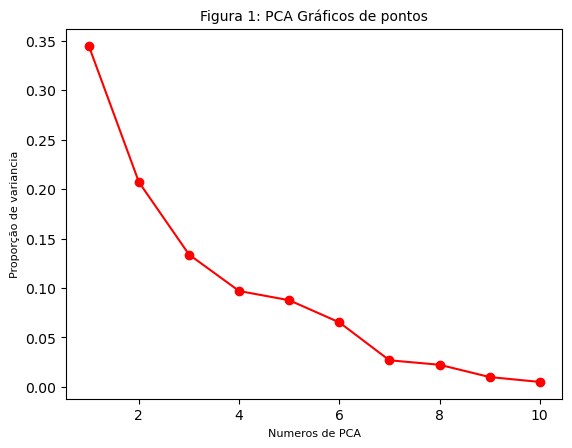

In [16]:
PC_numeros = np.arange(pca.n_components_)+1

plt.plot(PC_numeros, prop_var, 'ro-')

plt.title('Figura 1: PCA Gráficos de pontos', fontsize = 10)
plt.ylabel('Proporção de variancia', fontsize = 8)
plt.xlabel('Numeros de PCA', fontsize = 8)

plt.show()

In [18]:
pca_otimo = PCA(n_components=4)
PC = pca_otimo.fit_transform(scaler_x)

In [20]:
pca_metal = pd.DataFrame(data = PC, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

display(pca_metal.head(10))

,PC1,PC2,PC3,PC4
0,0.172612,-1.463898,0.703101,0.438739
1,0.205881,-1.388872,0.622007,0.380576
2,0.020852,-1.347610,0.790404,0.379806
3,0.307663,-1.430466,0.433342,0.522138
4,0.893253,-0.204428,1.071211,0.915587
5,0.067582,-1.335226,0.738502,0.358516
6,0.498248,-1.438599,0.250311,0.491146
7,0.454858,-1.382081,0.258911,0.457055
8,0.275485,-1.385178,0.447817,0.488508
9,0.623126,-1.454837,-0.043773,0.696298


In [23]:
# biplot 
def biplot(score, coef, labels=None):

    xs=score[:,0]
    ys=score[:,1]
    n=coef.shape[0]

    scalex = 1/(xs.max() - xs.min())
    scaley = 1/(ys.max() - ys.min())

    plt.scatter(xs * scalex, ys * scaley, s = 5, color ='orange')

    for i in range(n):
        plt.arrow(0, 0, coef[i, 0], coef[i, 1], color = 'red', alpha = 0.5)
        plt.text(coef[i, 0] *1.15, coef[i, 1], labels = [i], color = 'darklbue', ha = 'center', va ='center')

    
    plt.xlabel('PC{}'.format(1))
    plt.ylabel('PC{}'.format(2))

    plt.figure()

TypeError: text() missing 1 required positional argument: 's'

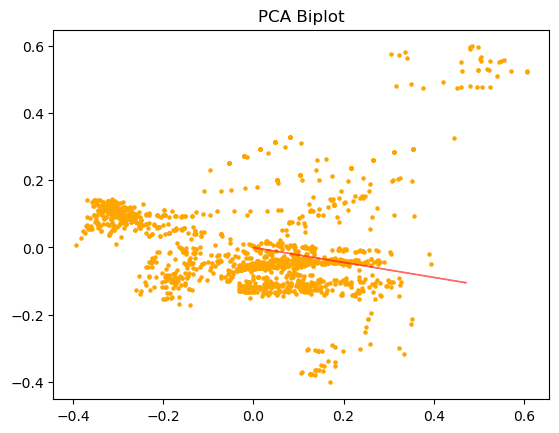

In [24]:
plt.title('PCA Biplot')

biplot(PC, np.transpose(pca_otimo.components_), list(df.columns))

Determinando o número de clusters

In [52]:
wcs = {}

for i in range (1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(X)
    wcs[i] = kmeans.inertia_

/Volumes/Dados_1/Aplicativos/anaconda3/envs/tcc_dsa/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Volumes/Dados_1/Aplicativos/anaconda3/envs/tcc_dsa/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Volumes/Dados_1/Aplicativos/anaconda3/envs/tcc_dsa/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Volumes/Dados_1/Aplicativos/anaconda3/envs/tcc_dsa/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Volumes/Dados_1/Aplicativos/anaconda3/envs/tcc_dsa/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

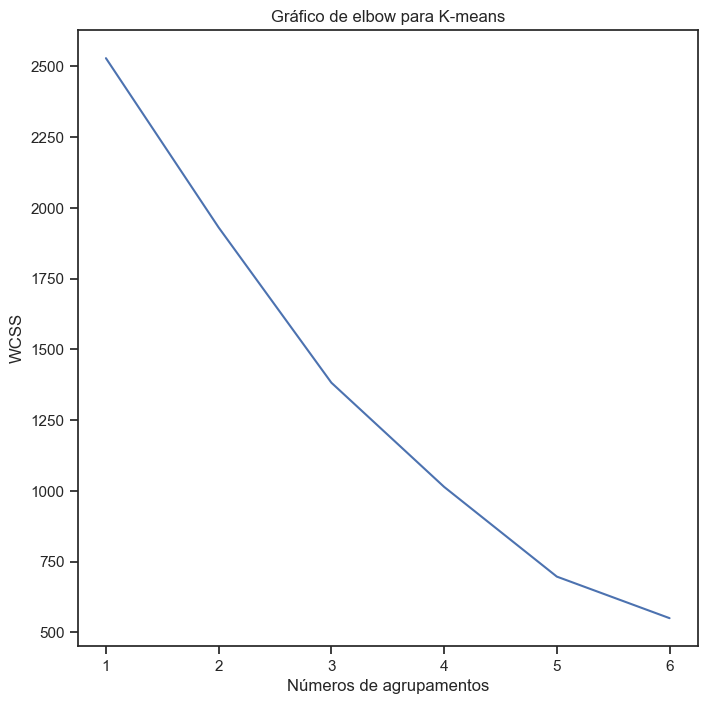

In [53]:
#Gráfico de elbow
sns.set_theme(style ='ticks')

f, ax = plt.subplots(figsize = (8,8))

sns.lineplot(x = wcs.keys(), y = wcs.values(), markers='*', markersize = 50)

ax.set(xlabel='Números de agrupamentos')
ax.set(ylabel= 'WCSS')
ax.set(title = 'Gráfico de elbow para K-means')

plt.show()

In [9]:
#cross validation
from sklearn.model_selection import train_test_split

treino_var, teste_var, treino_resposta, teste_resposta = train_test_split(df_var, df_resposta, test_size=0.3)

Random florest classificador

In [93]:
#separando as variáveis em propriedades e nomes das colunas
X = df_ML.iloc[:, 1:-1].values
Y = df_ML.iloc[:, 1].values

In [94]:
rf = RandomForestClassifier(n_estimators=100, random_state=50)
rf.fit(X, Y)

RandomForestClassifier(random_state=50)

In [95]:
#visualizando a arvore de decisão
dot_data = export_graphviz(rf.estimator_[0], out_file=None,
                           feature_names=['Su', 'Sy', 'E', 'G', 'mu', 'Ro'],
                           class_names=['1', '2', '3', '4', '5'], filled=True, rounded=True)

TypeError: 'DecisionTreeClassifier' object is not subscriptable

In [ ]:
grafico = graphviz.Source(dot_data, format = 'png')